In [1]:
import requests
import json


In [6]:
html=requests.get('https://doe.icfwebservices.com/microgrid')
html.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [7]:
text=html.text
print(text)

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html lang="en" class="no-js ie6"> <![endif]-->
<!--[if IE 7 ]>    <html lang="en" class="no-js ie7"> <![endif]-->
<!--[if IE 8 ]>    <html lang="en" class="no-js ie8"> <![endif]-->
<!--[if IE 9 ]>    <html lang="en" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="en" class="no-js">
<!--<![endif]-->
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <title>U.S. Department of Energy Combined Heat &amp; Power and Microgrid Installation Databases</title>
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="shortcut icon" href="/assets/favicon-ed7626479f9b45ce6d16eea74749ae91.ico" type="image/x-icon">
    <link href="https://fonts.googleapis.com/css2?family=Open+Sans:ital,wght@0,400;0,700;1,400;1,700&display=swap" rel="stylesheet">
    <link rel="stylesheet" href="/assets/application-425b5c15525

In [15]:
import geopandas as gpd
import json

json_string = requests.get('https://doe.icfwebservices.com/microgrids/index').text
json_string

'{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[-73.97165,40.74845]},"properties":{"id":371491,"state":"NY","projectName":"2 Tudor City Place","organizationName":"2 Tudor City","application":"Multi-Family","capacity":150.0,"capacityStr":"150","technologies":["CHP"],"tech_chp":true,"tech_biogas":false,"tech_diesel":false,"tech_fuelcell":false,"tech_hydro":false,"tech_natgas":false,"tech_solar":false,"tech_storage":false,"tech_wind":false,"tech_controls":false,"grid_type":"Continuous"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-73.974,40.78842]},"properties":{"id":371492,"state":"NY","projectName":"Glenn Gardens Apartments","organizationName":"A&E Real Estate Holdings","application":"Multi-Family","capacity":200.0,"capacityStr":"200","technologies":["CHP"],"tech_chp":true,"tech_biogas":false,"tech_diesel":false,"tech_fuelcell":false,"tech_hydro":false,"tech_natgas":false,"tech_solar":false,"tech_storage":false,"tech_

In [17]:
# Assuming the data is stored in a variable called 'data'
data = json.loads(json_string)

# Load data into a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(data["features"])

# Now you can work with 'gdf' as with a regular pandas DataFrame
gdf.head()

,geometry,id,state,projectName,organizationName,application,capacity,capacityStr,technologies,tech_chp,tech_biogas,tech_diesel,tech_fuelcell,tech_hydro,tech_natgas,tech_solar,tech_storage,tech_wind,tech_controls,grid_type
0,POINT (-73.97165 40.74845),371491,NY,2 Tudor City Place,2 Tudor City,Multi-Family,150.0,150,[CHP],True,False,False,False,False,False,False,False,False,False,Continuous
1,POINT (-73.97400 40.78842),371492,NY,Glenn Gardens Apartments,A&E Real Estate Holdings,Multi-Family,200.0,200,[CHP],True,False,False,False,False,False,False,False,False,False,Continuous
2,POINT (-73.65230 40.71990),371493,NY,Adelphi University,Adelphi University,College/University,1979.0,"1,979",[CHP],True,False,False,False,False,False,False,False,False,False,Continuous
3,POINT (-121.64075 39.74640),371494,CA,Feather River Health Center,Adventist Health,Hospital/Healthcare,675.0,675,"[Solar, Storage]",False,False,False,False,False,False,True,True,False,False,Continuous
4,POINT (-73.78048 40.77850),371495,NY,Bay Club Apartments,Aegis Energy Services,Commercial,375.0,375,[CHP],True,False,False,False,False,False,False,False,False,False,Continuous


<Axes: >

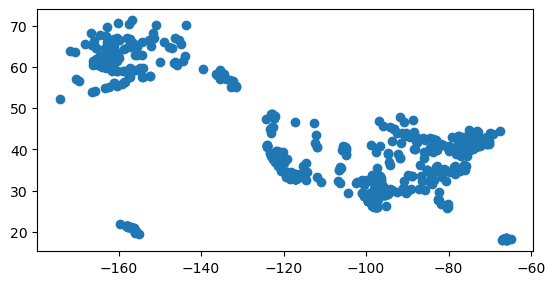

In [22]:
gdf.plot()

In [29]:
import folium

# Create a folium map with a Carto basemap
m = folium.Map(tiles='CartoDB positron')

# Add the GeoDataFrame to the map
gdf.explore(m=m)

# Display the map
m

In [31]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
gdf.technologies.value_counts()

technologies
[Natural Gas]                                            309
[CHP]                                                    225
[Solar, Storage]                                         137
[Natural Gas, Solar, Storage]                             25
[Diesel]                                                  25
[Diesel, Solar, Storage]                                  23
[CHP, Wind]                                               20
[CHP, Solar]                                              18
[CHP, Diesel]                                             12
[Storage]                                                 11
[CHP, Solar, Storage]                                     10
[CHP, Hydro]                                               7
[Fuel Cell]                                                7
[Solar, Storage, Wind]                                     7
[Hydro]                                                    7
[Diesel, Solar]                                            6
[Diesel, Na

In [34]:
gdf['technologies'].apply(lambda x: 'wind' in [tech.lower() for tech in x]).sum()

65

In [36]:
from collections import Counter

# Flatten the list of technologies and count the occurrences of each technology
tech_counts = Counter([tech.lower() for sublist in gdf['technologies'] for tech in sublist])

# Now 'tech_counts' is a dictionary where the keys are the technologies and the values are their counts
tech_counts

Counter({'natural gas': 364,
         'chp': 333,
         'solar': 294,
         'storage': 276,
         'diesel': 117,
         'wind': 65,
         'hydro': 27,
         'fuel cell': 24,
         'biogas': 15})

In [37]:
# Filter rows where 'wind' is in the 'technologies' list
wind_gdf = gdf[gdf['technologies'].apply(lambda x: 'wind' in [tech.lower() for tech in x])]
wind_gdf

,geometry,id,state,projectName,organizationName,application,capacity,capacityStr,technologies,tech_chp,tech_biogas,tech_diesel,tech_fuelcell,tech_hydro,tech_natgas,tech_solar,tech_storage,tech_wind,tech_controls,grid_type
12,POINT (-121.88796 37.71768),371503,CA,"Alameda County’s Santa Rita Jail Microgrid, Du...",Alameda County,Public Institution,6715.0,"6,715","[CHP, Diesel, Solar, Storage, Wind]",True,False,True,False,False,False,True,True,True,False,Continuous
19,POINT (-170.27995 57.12250),371510,AK,St. Paul Island,Alaska Village Electric Cooperative,City/Community,9275.0,"9,275","[CHP, Diesel, Storage, Wind]",True,False,True,False,False,False,False,True,True,False,Continuous
20,POINT (-168.08750 65.60917),371511,AK,"Wales, Alaska",Alaska Village Electric Cooperative,City/Community,672.0,672,"[CHP, Wind]",True,False,False,False,False,False,False,False,True,False,Continuous
21,POINT (-170.47889 63.69417),371512,AK,"Savoonga, Alaska",Alaska Village Electric Cooperative,City/Community,1870.0,"1,870","[CHP, Wind]",True,False,False,False,False,False,False,False,True,False,Continuous
22,POINT (-165.10250 60.53028),371513,AK,"Toksook Bay, Alaska",Alaska Village Electric Cooperative,City/Community,1700.0,"1,700","[CHP, Wind]",True,False,False,False,False,False,False,False,True,False,Continuous
24,POINT (-163.17795 62.05121),371515,AK,"Saint (St.) Mary’s, Pitka’s Point, Mountain Vi...",Alaska Village Electric Cooperative,City/Community,9218.0,"9,218","[CHP, Diesel, Wind]",True,False,True,False,False,False,False,False,True,False,Continuous
28,POINT (-171.72340 63.75690),371519,AK,"Gambell, AK",Alaska Village Electric Cooperative,City/Community,1600.0,"1,600","[CHP, Wind]",True,False,False,False,False,False,False,False,True,False,Continuous
29,POINT (-162.51810 60.89560),371520,AK,"Kasigluk, AK",Alaska Village Electric Cooperative,City/Community,1500.0,"1,500","[CHP, Wind]",True,False,False,False,False,False,False,False,True,False,Continuous
34,POINT (-161.89090 59.74400),371525,AK,"Quinhagak, AK",Alaska Village Electric Cooperative,City/Community,1000.0,"1,000","[CHP, Wind]",True,False,False,False,False,False,False,False,True,False,Continuous
36,POINT (-160.00690 66.60390),371527,AK,"Selawik, AK",Alaska Village Electric Cooperative,City/Community,1946.0,"1,946","[CHP, Wind]",True,False,False,False,False,False,False,False,True,False,Continuous


In [51]:
print(gdf.crs)

EPSG:4326


In [49]:
# Set the CRS to WGS84 (EPSG code 4326)
gdf = gdf.set_crs("EPSG:4326")

In [52]:
# Set the CRS to WGS84 (EPSG code 4326)
wind_gdf = wind_gdf.set_crs("EPSG:4326")

In [53]:
print(wind_gdf.crs)

EPSG:4326


In [54]:
# Create a folium map with a CartoDB positron basemap
m = folium.Map(tiles='CartoDB positron')

# Add the GeoDataFrame to the map
folium.GeoJson(wind_gdf).add_to(m)

# Display the map
m

In [55]:
import requests
import json

# API endpoint for the microgrid data
api_url = 'https://doe.icfwebservices.com/microgrids/index'

# Send a GET request to the API
response = requests.get(api_url)

response

<Response [200]>

In [56]:
# Check if the request was successful
if response.status_code == 200:
    # Load the JSON data
    data = response.json()
    
    # Now you can work with the JSON data
    # For example, print the first microgrid's information
    if data and isinstance(data, list) and len(data) > 0:
        print(f"First microgrid's information: {data[0]}")
    else:
        print('No data found or unexpected data format.')
else:
    print(f'Failed to fetch data from the API. Status code: {response.status_code}')


No data found or unexpected data format.


In [57]:
data = response.json()
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-73.97165, 40.74845]},
   'properties': {'id': 371491,
    'state': 'NY',
    'projectName': '2 Tudor City Place',
    'organizationName': '2 Tudor City',
    'application': 'Multi-Family',
    'capacity': 150.0,
    'capacityStr': '150',
    'technologies': ['CHP'],
    'tech_chp': True,
    'tech_biogas': False,
    'tech_diesel': False,
    'tech_fuelcell': False,
    'tech_hydro': False,
    'tech_natgas': False,
    'tech_solar': False,
    'tech_storage': False,
    'tech_wind': False,
    'tech_controls': False,
    'grid_type': 'Continuous'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-73.974, 40.78842]},
   'properties': {'id': 371492,
    'state': 'NY',
    'projectName': 'Glenn Gardens Apartments',
    'organizationName': 'A&E Real Estate Holdings',
    'application': 'Multi-Family',
    'capacity': 200.0,
    'capacityStr': '200',
   

In [58]:
import geopandas as gpd
gdf=gpd.GeoDataFrame.from_features(data)
gdf.head()

,geometry,id,state,projectName,organizationName,application,capacity,capacityStr,technologies,tech_chp,tech_biogas,tech_diesel,tech_fuelcell,tech_hydro,tech_natgas,tech_solar,tech_storage,tech_wind,tech_controls,grid_type
0,POINT (-73.97165 40.74845),371491,NY,2 Tudor City Place,2 Tudor City,Multi-Family,150.0,150,[CHP],True,False,False,False,False,False,False,False,False,False,Continuous
1,POINT (-73.97400 40.78842),371492,NY,Glenn Gardens Apartments,A&E Real Estate Holdings,Multi-Family,200.0,200,[CHP],True,False,False,False,False,False,False,False,False,False,Continuous
2,POINT (-73.65230 40.71990),371493,NY,Adelphi University,Adelphi University,College/University,1979.0,"1,979",[CHP],True,False,False,False,False,False,False,False,False,False,Continuous
3,POINT (-121.64075 39.74640),371494,CA,Feather River Health Center,Adventist Health,Hospital/Healthcare,675.0,675,"[Solar, Storage]",False,False,False,False,False,False,True,True,False,False,Continuous
4,POINT (-73.78048 40.77850),371495,NY,Bay Club Apartments,Aegis Energy Services,Commercial,375.0,375,[CHP],True,False,False,False,False,False,False,False,False,False,Continuous


In [61]:
print(gdf.crs)

None


<Axes: >

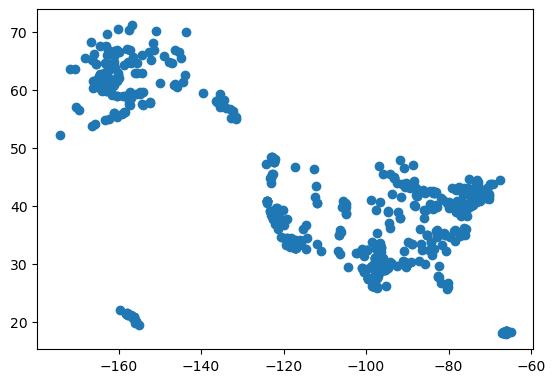

In [62]:
gdf.set_crs("EPSG:4326", inplace=True)
gdf.plot()